#The code below is the multicalss softmax function:
#The code below is the multicalss softmax function:







[[ 3.27427229  4.44308383 -4.71735611]
 [-2.98732111  2.32059567  3.66672544]
 [ 7.38935305 -2.2483107  -2.14104235]]


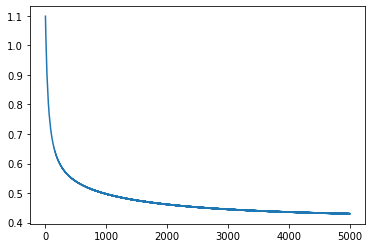

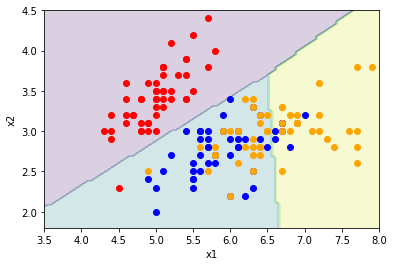

In [30]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad
import math

from sklearn import datasets
iris = datasets.load_iris()
# get labels and features, use sepal this time
y = iris.target
x1 = iris.data[:,0]
x2 = iris.data[:,1]
x= np.array([x1,x2])
x= x.T

def model(x,w):
    a = w[0] + np.dot(x,w[1:])
    return a

def Cross_entropy_Categorical(w,x,y):
    a = model(x,w)
    exp_a = np.exp(a)
    sum =np.sum(exp_a,axis=1)
    b = exp_a[np.arange(np.size(y)), y.astype(int)]
    cost = -np.sum(np.log(b/sum))
    return cost/float(np.size(y))

def Cross_Entropy_CATE(t):
    Cross_Entropy_CATE =Cross_entropy_Categorical(t,x,y)
    return Cross_Entropy_CATE


def multiclass_soft_max(w,x,y):
    # pre-compute predictions on all points
    all_evals = model(x,w)
    a = np.log(np.exp(all_evals).sum(axis = 1))
    # compute cost in compact form using numpy broadcasting
    b = all_evals[np.arange(np.size(y)), y.astype(int)]
    cost = np.sum(a-b)
    # return average
    return cost/float(np.size(y))

def Multi_Soft_max(t):
    Multi_Soft_max =multiclass_soft_max(t,x,y)
    return Multi_Soft_max



def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func



C = 3 # n. classes
iter = 5000
N = 2
w = np.ones((N+1,C))
#def c(t):
   # c = Multi_Soft_max(x,y,t)
  #  return c
a, b, unflatten = gradient_descent(Multi_Soft_max,0.1,iter,w)

plt.figure(0)
plt.plot(b)

wp = unflatten(a[iter])
print(wp)

xp1, xp2 = np.meshgrid(np.linspace(3.5,8,100),np.linspace(1.8,4.5,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
v=model(Xp_data,wp)
z=np.argmax(v,axis=1)

z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2');

plt.figure(1)

plt.scatter(x1[y==0],x2[y==0],c='r')
plt.scatter(x1[y==1],x2[y==1],c='b')
plt.scatter(x1[y==2],x2[y==2],c='orange')


#The code below is the multicalss cross-entroy function
#The code below is the multicalss cross-entroy function

[[ 3.27427229  4.44308383 -4.71735611]
 [-2.98732111  2.32059567  3.66672544]
 [ 7.38935305 -2.2483107  -2.14104235]]


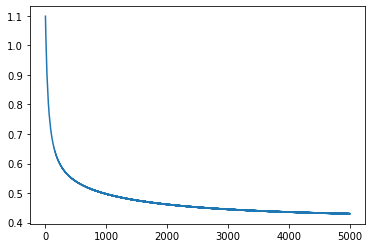

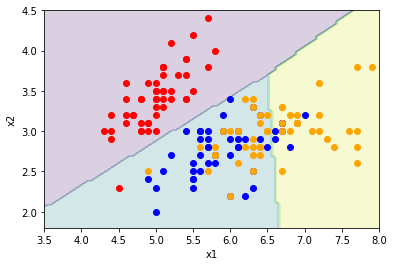

In [31]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad
import math

from sklearn import datasets
iris = datasets.load_iris()
# get labels and features, use sepal this time
y = iris.target
x1 = iris.data[:,0]
x2 = iris.data[:,1]
x= np.array([x1,x2])
x= x.T

def model(x,w):
    a = w[0] + np.dot(x,w[1:])
    return a

def Cross_entropy_Categorical(w,x,y):
    a = model(x,w)
    exp_a = np.exp(a)
    sum =np.sum(exp_a,axis=1)
    b = exp_a[np.arange(np.size(y)), y.astype(int)]
    cost = -np.sum(np.log(b/sum))
    return cost/float(np.size(y))

def Cross_Entropy_CATE(t):
    Cross_Entropy_CATE =Cross_entropy_Categorical(t,x,y)
    return Cross_Entropy_CATE


def multiclass_soft_max(w,x,y):
    # pre-compute predictions on all points
    all_evals = model(x,w)
    a = np.log(np.exp(all_evals).sum(axis = 1))
    # compute cost in compact form using numpy broadcasting
    b = all_evals[np.arange(np.size(y)), y.astype(int)]
    cost = np.sum(a-b)
    # return average
    return cost/float(np.size(y))

def Multi_Soft_max(t):
    Multi_Soft_max =multiclass_soft_max(t,x,y)
    return Multi_Soft_max



def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func



C = 3 # n. classes
iter = 5000
N = 2
w = np.ones((N+1,C))
#def c(t):
   # c = Multi_Soft_max(x,y,t)
  #  return c
a, b, unflatten = gradient_descent(Cross_Entropy_CATE,0.1,iter,w)

plt.figure(0)
plt.plot(b)

wp = unflatten(a[iter])
print(wp)

xp1, xp2 = np.meshgrid(np.linspace(3.5,8,100),np.linspace(1.8,4.5,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
v=model(Xp_data,wp)
z=np.argmax(v,axis=1)

z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2');

plt.figure(1)

plt.scatter(x1[y==0],x2[y==0],c='r')
plt.scatter(x1[y==1],x2[y==1],c='b')
plt.scatter(x1[y==2],x2[y==2],c='orange')


Q2(C), From the figures we can see that A(multi-class softmax function) and B (categorial cross entropy function) are equal. This is because that the softmax function is equivalent to cross-entropy function in mathematical expression. and all the weights are involved into the calculation.

However, these figures(a and b) are different from multi-class perceptron. This is because in both multi-class softmax and categorical cross-entropy functions, are the weights are used into the calculation, while in multi-class perceptron, we only pick the max value of X*Wi to minus X*Wyp. so generally, the figures in a and b are much more precise than the figures in the textbook(multi-class perceptron).
